# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
while len(cities) < 623:
    lat = np.random.uniform(lat_range[0], lat_range[1])
    lng = np.random.uniform(lng_range[0], lng_range[1])
    city = citipy.nearest_city(lat, lng).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        lat_lngs.append((lat, lng))

# Print the city count to confirm sufficient count
print(f"Number of cities in this list: {len(cities)}")

Number of cities in this list: 623


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import requests

# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={e4c59d5127e16689fe9efa59292b42b6}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate([]):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

import requests

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Define the units for the weather data
units = "metric"  # or "imperial" for Fahrenheit

# Assign your API key to a variable
API_key = "e4c59d5127e16689fe9efa59292b42b6"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i != 0:
        set_count += 1
        record_count = 0
    
    # Add 1 to the record count
    record_count += 1
    
    # Create endpoint URL with each city
    city_url = f"{url}?q={city.title()}&units={units}&appid={API_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | tralee
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | forster
Processing Record 6 of Set 1 | preobrazheniye
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | calabugao
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | rundu
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | zhaozhou
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | nova xavantina
Processing Record 17 of Set 1 | ad dilam
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | bakanas
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | st. john's
Proc

Processing Record 37 of Set 4 | toga village
City not found. Skipping...
Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | fiambala
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | papatowai
Processing Record 42 of Set 4 | klyuchi
Processing Record 43 of Set 4 | juneau
Processing Record 44 of Set 4 | patterson
Processing Record 45 of Set 4 | nikolayevsk-on-amure
Processing Record 46 of Set 4 | dhamnod
Processing Record 47 of Set 4 | chiili
City not found. Skipping...
Processing Record 48 of Set 4 | acarau
Processing Record 49 of Set 4 | vilyuysk
Processing Record 50 of Set 4 | magadan
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | jayapura
Processing Record 3 of Set 5 | port saint john's
Processing Record 4 of Set 5 | nayoro
Processing Record 5 of Set 5 | greymouth
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | keita
Processing Record 8 of Set 5 | uige
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | labuan
Processing Record 28 of Set 8 | farim
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | fray luis beltran
Processing Record 32 of Set 8 | zhezqazghan
Processing Record 33 of Set 8 | chicxulub puerto
City not found. Skipping...
Processing Record 34 of Set 8 | talakan
Processing Record 35 of Set 8 | khanty-mansiysk
Processing Record 36 of Set 8 | calapan
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | eyl
Processing Record 39 of Set 8 | suva
Processing Record 40 of Set 8 | tolanaro
Processing Record 41 of Set 8 | ujae
Processing Record 42 of Set 8 | ayorou
Processing Record 43 of Set 8 | galliano
Processing Record 44 of Set 8 | ketchikan
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | jwaneng
Processing Record 47 of Set 8 | cidreira
Processing Record 48 of Set 8 | ijuw
City not found. Skipping...
Processing Record 49 of Set 8 | neiafu
Proces

Processing Record 13 of Set 12 | ghat
Processing Record 14 of Set 12 | tarbes
Processing Record 15 of Set 12 | pachino
Processing Record 16 of Set 12 | cumana
Processing Record 17 of Set 12 | parbatipur
Processing Record 18 of Set 12 | mega
Processing Record 19 of Set 12 | villamontes
Processing Record 20 of Set 12 | ivdel'
Processing Record 21 of Set 12 | fisterra
Processing Record 22 of Set 12 | valparaiso
Processing Record 23 of Set 12 | vetluga
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | tocoa
Processing Record 26 of Set 12 | krasnaya yaruga
Processing Record 27 of Set 12 | hadleigh
Processing Record 28 of Set 12 | gaalkacyo
Processing Record 29 of Set 12 | lospalos
Processing Record 30 of Set 12 | san angelo
Processing Record 31 of Set 12 | west valley
Processing Record 32 of Set 12 | erenhot
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Set 12 | hilo
Processing Record 35 of Set 12 | monetnyy
Processing Record 36 of Set 12 | 

In [7]:
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [9]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,21.56,88,6,5.02,ZA,1706754660
1,tralee,52.2704,-9.7026,4.81,85,100,0.74,IE,1706755249
2,whitehorse,60.7161,-135.0538,-9.57,67,75,3.60,CA,1706754438
3,forster,-32.1667,152.5167,28.49,66,46,4.04,AU,1706755250
4,preobrazheniye,42.9019,133.9064,-12.47,44,1,3.69,RU,1706755250
5,aasiaat,68.7098,-52.8699,-25.87,98,87,5.11,GL,1706755251
6,calabugao,8.4564,125.1589,20.17,99,100,0.05,PH,1706755251
7,east london,-33.0153,27.9116,22.82,87,35,6.12,ZA,1706754524
8,rundu,-17.9333,19.7667,18.99,85,98,1.98,NA,1706755252
9,new norfolk,-42.7826,147.0587,24.72,48,96,6.83,AU,1706755252


In [10]:
# Export the City_Data into a csv
import os

# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Ensure CSV was Saved Correctly
print("CSV file saved successfully.")


CSV file saved successfully.


In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,88,6,5.02,ZA,1706754660
1,tralee,52.2704,-9.7026,4.81,85,100,0.74,IE,1706755249
2,whitehorse,60.7161,-135.0538,-9.57,67,75,3.60,CA,1706754438
3,forster,-32.1667,152.5167,28.49,66,46,4.04,AU,1706755250
4,preobrazheniye,42.9019,133.9064,-12.47,44,1,3.69,RU,1706755250


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

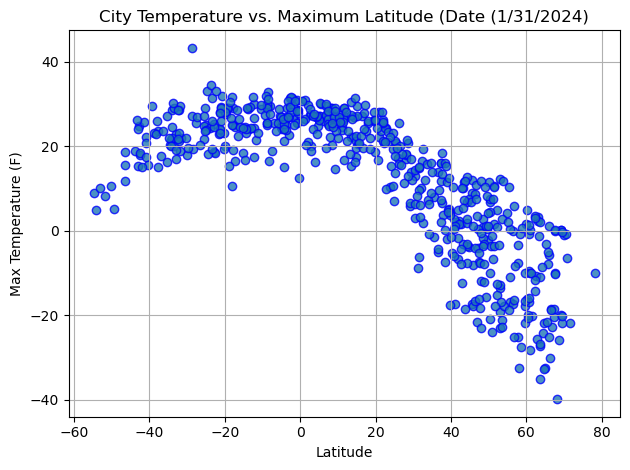

In [12]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8, label='City', edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Temperature vs. Maximum Latitude ({'Date (1/31/2024'})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

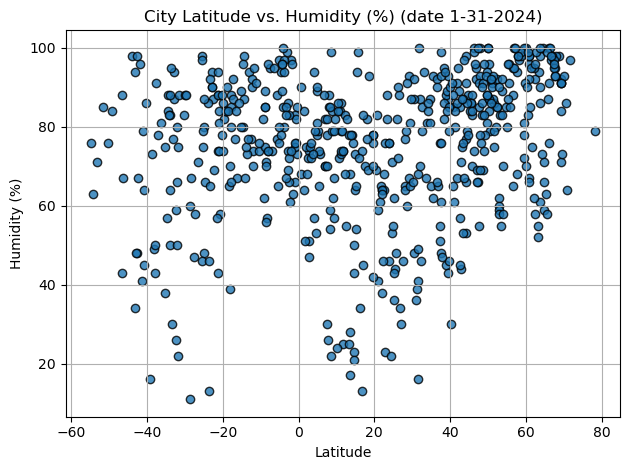

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({'date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

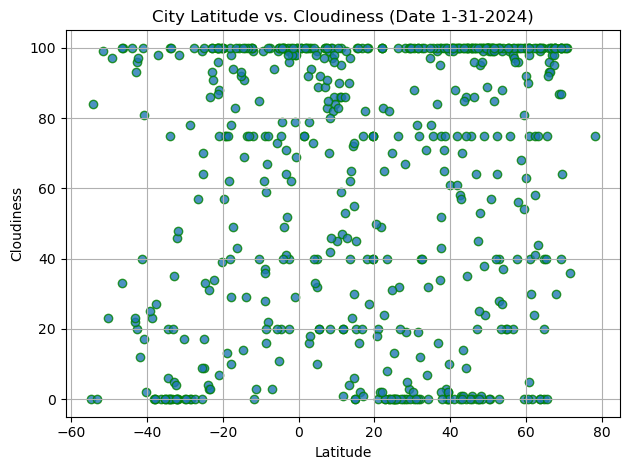

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="g")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({'Date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

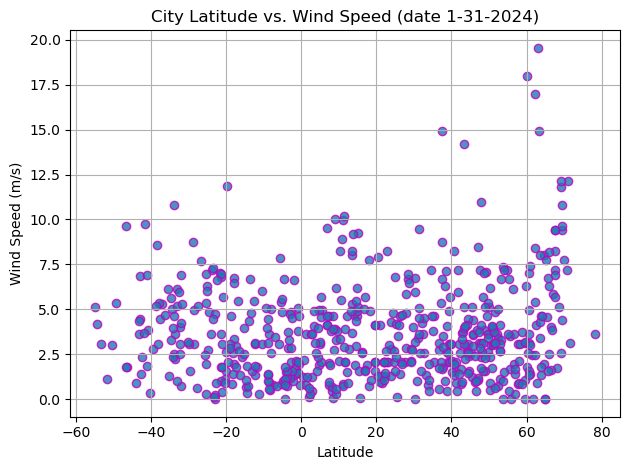

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="m")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({'date 1-31-2024'})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tralee,52.2704,-9.7026,4.81,85,100,0.74,IE,1706755249
2,whitehorse,60.7161,-135.0538,-9.57,67,75,3.60,CA,1706754438
4,preobrazheniye,42.9019,133.9064,-12.47,44,1,3.69,RU,1706755250
5,aasiaat,68.7098,-52.8699,-25.87,98,87,5.11,GL,1706755251
6,calabugao,8.4564,125.1589,20.17,99,100,0.05,PH,1706755251


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])


# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,88,6,5.02,ZA,1706754660
3,forster,-32.1667,152.5167,28.49,66,46,4.04,AU,1706755250
7,east london,-33.0153,27.9116,22.82,87,35,6.12,ZA,1706754524
8,rundu,-17.9333,19.7667,18.99,85,98,1.98,NaN,1706755252
9,new norfolk,-42.7826,147.0587,24.72,48,96,6.83,AU,1706755252


###  Temperature vs. Latitude Linear Regression Plot

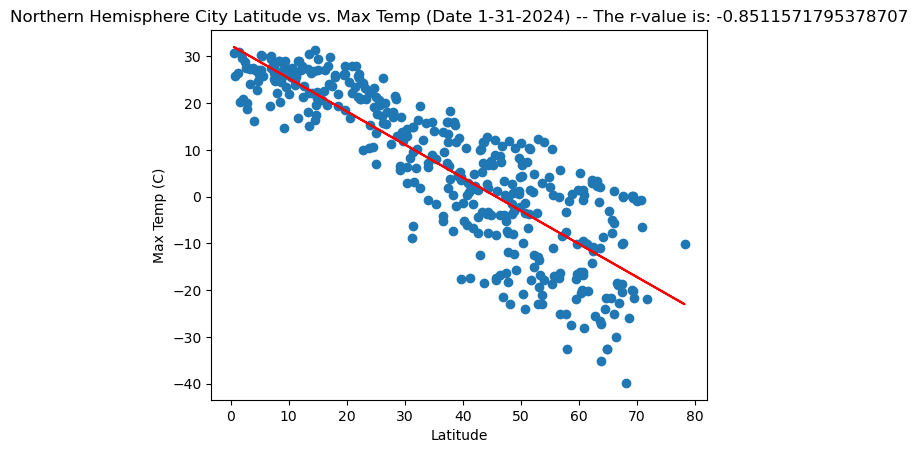

In [20]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy import stats

def linearRegression(x, y, alpha, beta, title, x_label, y_label):
    # Perform linear regression and calculate r-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Update the title with the correct r-value
    title = f"{title} -- The r-value is: {r_value}"
    
    # Plot the scatter plot
    plt.scatter(x, y)
    
    # Plot the trend line
    plt.plot(x, intercept + slope * x, color='red')
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()

# Call the linearRegression function with the provided arguments
title = f"Northern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
alpha = 0.05
beta = 0.2
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha, beta, title, x_label, y_label)


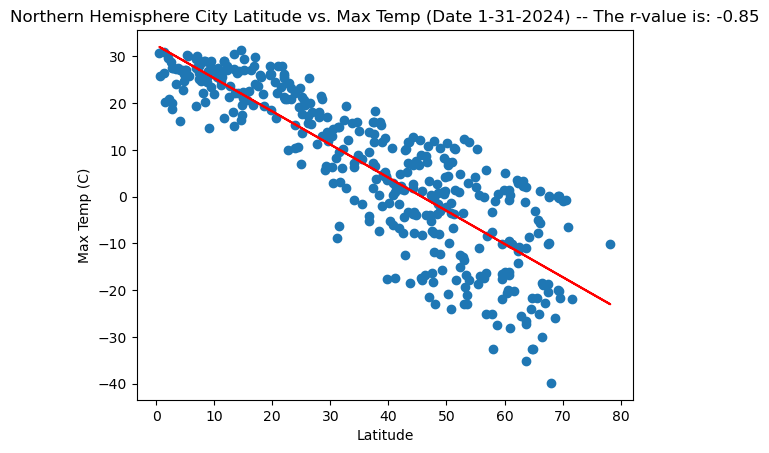

In [21]:
import matplotlib.pyplot as plt
from scipy import stats

def linearRegression(x, y, alpha, beta, title, x_label, y_label):
    # Perform linear regression and calculate r-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Plot the scatter plot
    plt.scatter(x, y)
    
    # Plot the trend line
    plt.plot(x, intercept + slope * x, color='red')
    
    # Set the labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the r-value in the title
    plt.title(f"{title} -- The r-value is: {r_value:.2f}")
    
    # Show the plot
    plt.show()

# Call the linearRegression function with the provided arguments
title = f"Northern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
alpha = 0.05
beta = 0.2
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha, beta, title, x_label, y_label)







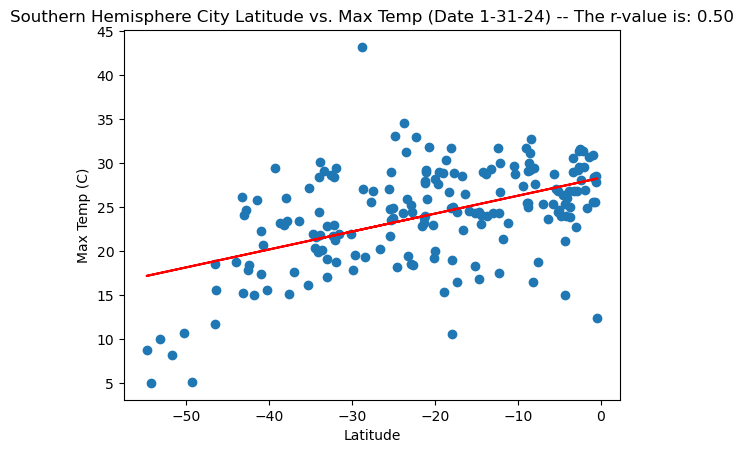

In [22]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-24'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)


In [24]:
#**Discussion about the linear relationship:**
    #There is a direct correlation about the linear relationship between lattitude and max temperatures. Areas with lower latitudes (i.e. areas near the equator) will certainly deal with higher temperatures. This concept is the same , just vice-versa, for areas with higher latitudes. Ultimately, there is a decrease in max temperatures as the latitude gets higher. The lower the latitude, the higher the temperature!

### Humidity vs. Latitude Linear Regression Plot

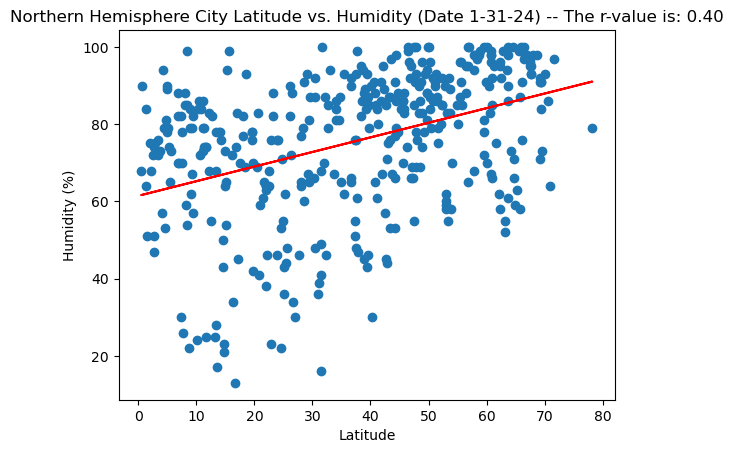

In [25]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity ({'Date 1-31-24'})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 0.55, 0.2, title, x_label, y_label)
    


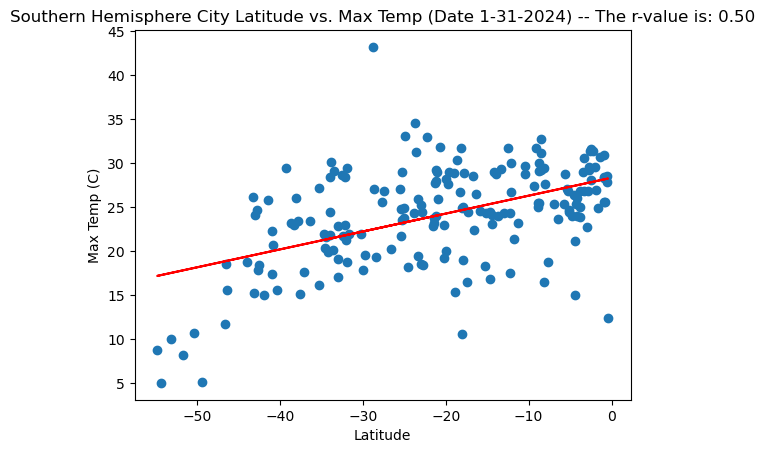

In [26]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** Based on my analysis of the data, it has become very clear that as you approach the equator, the maximum temperature is going to continue to increase. The further you are from the equator, the colder your temperatures will be!

### Cloudiness vs. Latitude Linear Regression Plot

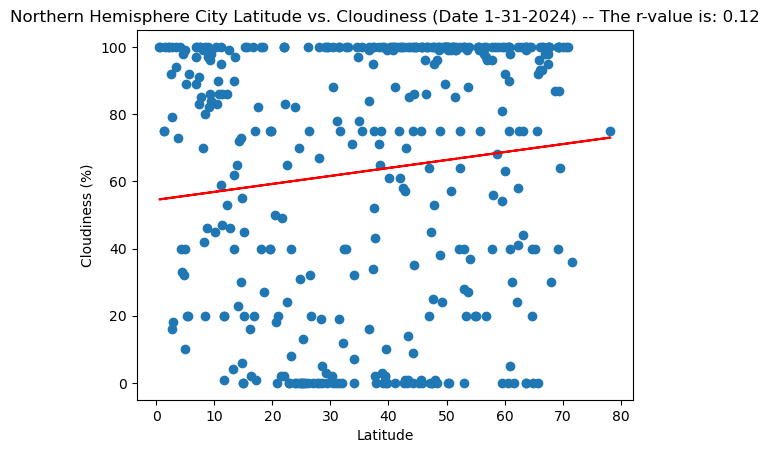

In [27]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness ({'Date 1-31-2024'})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], 0.55, 0.3, title, x_label, y_label)

The r-squared is: 0.3320020124929655


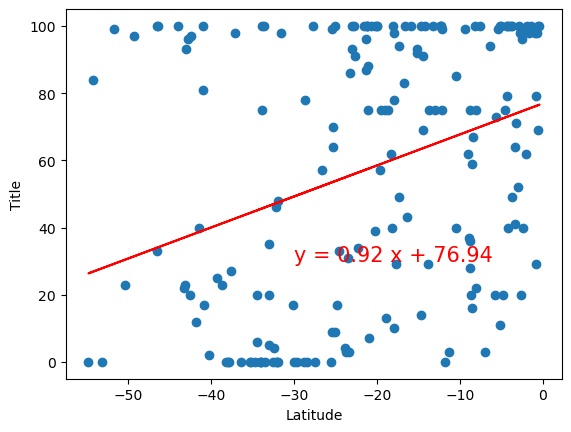

In [28]:
# Southern Hemisphere
x_values = southern_hemisphere_df ["Lat"]
y_values = southern_hemisphere_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Based on the models I created with the data set, it is very difficult to tell if there is a correlation, if any, betweeen wind speed and latitude. There are many outliers that make it hard to find a trend.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.17559486422432305


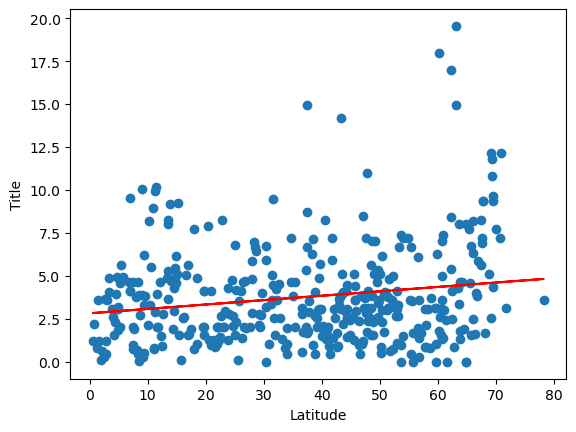

In [29]:
# Northern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: 0.17559486422432305


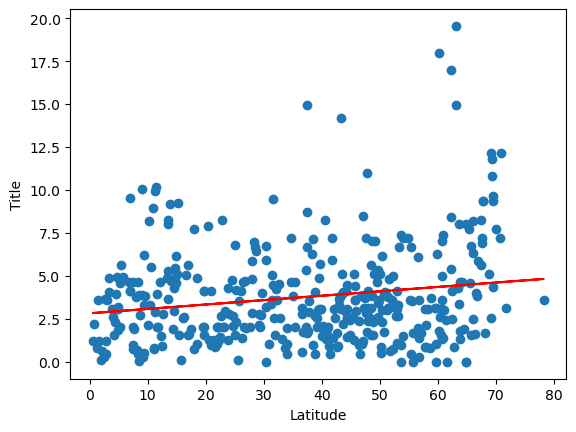

In [30]:
# Southern Hemisphere
x_values = northern_hemisphere_df ["Lat"]
y_values = northern_hemisphere_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

**Discussion about the linear relationship:** Based on the data vizualizations I created, there is no correlation between wind speed and latitude. Frankly, both plots looks very similar. No data has been found after analyzing any trends.